# Visualización de datasets con Geopandas

En este cuaderno mostramos la visualización de las secciones mediante la librería de Geopandas. El INE proporciona una vez al año las definiciones geométricas de las secciones electorales en formato shapely, y Geopandas utiliza éste por defento. Como su nombre indica, se trata de una librería integrada en pandas, y por lo tanto se puede desplegar en un cuaderno. Utilizaremos Geopandas para integrar nuestros datasets electorales, y lograr así una visualización bastante atractiva.

Tenemos que agraceder al usuario de github Shakasom, que proporciona el proceso de instalación al menos para google colab; normalmente la instalación de Geopandas es complicada. 

Estos son los comentarios de Shakasom sobre Geopandas, que desde luego es una persona más conocedora de la librería que nosotros:

_In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library._

_You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data._

Comenzamos instalando Geopandas en Colab, ya decimos que no es precisamente fácil.

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,921 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

Ahora cargamos las librerías necesarias, que incluyen varias que acabamos de instalar.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Los ficheros shapely se componen a su vez de varios componentes, que son leidos cuando cargamos el de extensión .shp. A continuación hacemos lo propio con las secciones de 2019.

Vemos que se trata aparentemente un dataframe de pandas común, que contiene la definición geométrica de cada sección en la columna 'geometry', así como datos adicionales sobre las secciones, incluyendo su código.

In [ ]:
secciones = gpd.read_file('/content/drive/MyDrive/Geopandas_A19/SECC_CE_20190101.shp')

In [ ]:
secciones.head()

OBJECTID  ...                                           geometry
0         1  ...  MULTIPOLYGON (((556453.835 4752758.332, 556460...
1         2  ...  POLYGON ((502035.230 4771813.197, 502048.071 4...
2         3  ...  MULTIPOLYGON (((538984.636 4718139.608, 538985...
3         4  ...  POLYGON ((537063.531 4703664.589, 536887.844 4...
4         6  ...  POLYGON ((551570.951 4739269.962, 551570.889 4...

[5 rows x 24 columns]

In [ ]:
secciones.shape

(36317, 24)

Para pintar las secciones basta aplicar el método .plot, y obtenemos nuestro primer mapa.

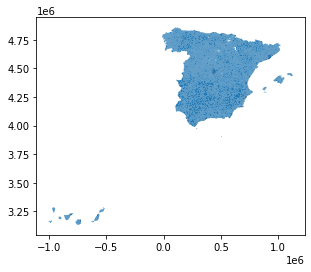

In [ ]:
secciones.plot()

Podemos aplicar los métodos de pandas para pintar, por ejemplo, la provincia de Álava.

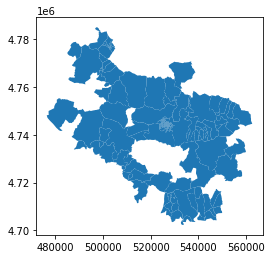

In [ ]:
secciones.loc[secciones['NPRO'] == 'Araba/Álava'].plot()

El dataframe tiene sus columnas, como cualquier otro, pero en este caso hay una, ya mencionada, que es de tipo geometry.

In [ ]:
secciones.dtypes

OBJECTID         int64
CUSEC           object
CUMUN           object
CSEC            object
CDIS            object
CMUN            object
CPRO            object
CCA             object
CUDIS           object
CLAU2           object
NPRO            object
NCA             object
CNUT0           object
CNUT1           object
CNUT2           object
CNUT3           object
ESTADO          object
OBS             object
Shape_Leng     float64
Shape_area     float64
Shape_len      float64
SUPERF_M2        int64
NMUN            object
geometry      geometry
dtype: object

Podemos pintar municipios también, en este caso el de Fuengirola. Vemos que geopandas tiene el color azul como fondo por defecto. Luego modificaremos esto.

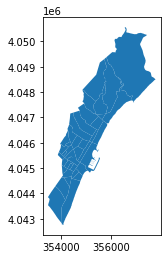

In [ ]:
secciones.loc[secciones['CUMUN'] == '29054'].plot()

In [ ]:
secciones

OBJECTID  ...                                           geometry
0             1  ...  MULTIPOLYGON (((556453.835 4752758.332, 556460...
1             2  ...  POLYGON ((502035.230 4771813.197, 502048.071 4...
2             3  ...  MULTIPOLYGON (((538984.636 4718139.608, 538985...
3             4  ...  POLYGON ((537063.531 4703664.589, 536887.844 4...
4             6  ...  POLYGON ((551570.951 4739269.962, 551570.889 4...
...         ...  ...                                                ...
36312     10673  ...  POLYGON ((17713.727 4798559.174, 17794.388 479...
36313     10659  ...  POLYGON ((75420.668 4796270.576, 75442.668 479...
36314     10189  ...  POLYGON ((59718.470 4802760.627, 59735.222 480...
36315     13100  ...  POLYGON ((151385.134 4180084.902, 151402.134 4...
36316     35989  ...  POLYGON ((372352.294 4067015.716, 372339.457 4...

[36317 rows x 24 columns]

Un factor crucial es la proyección con la que pintamos las secciones. En este caso es la 25830, que viene definida en los ficheros proporcionados por el INE en formato shapely.

In [ ]:
secciones.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-5.9999999999999, 35.265663028, 1.7053025658242e-13, 80.489344496333)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Los métodos de matplotlib son también aplicables, y podemos engrandecer el mapa, en este caso el de la Comunidad de Madrid.

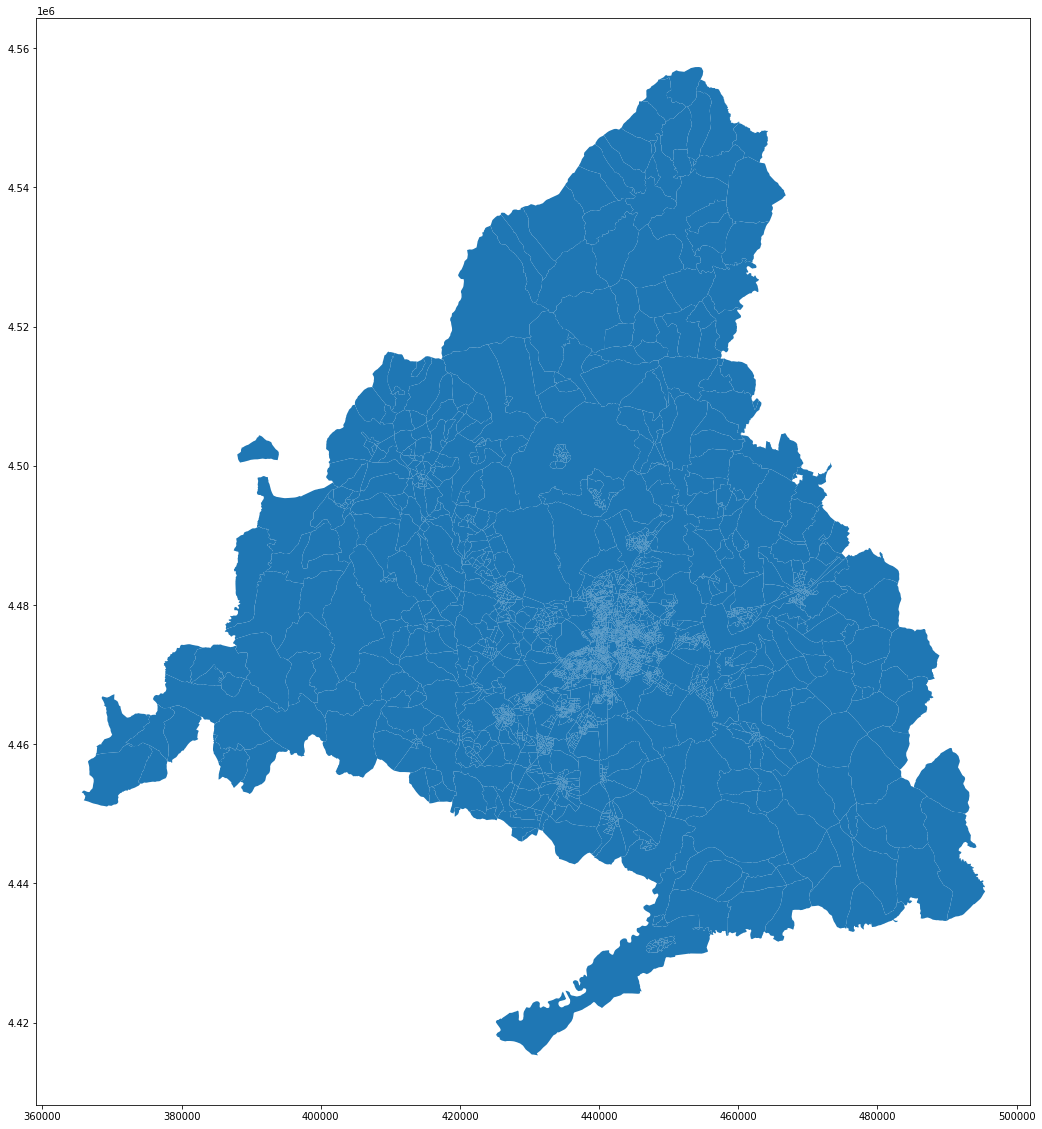

In [ ]:
secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20))

Este es un primer ejemplo del plano concreto del centro de Madrid, ya con los colores cambiados, y definiendo el color de los bordes.

(4465000.0, 4485000.0)

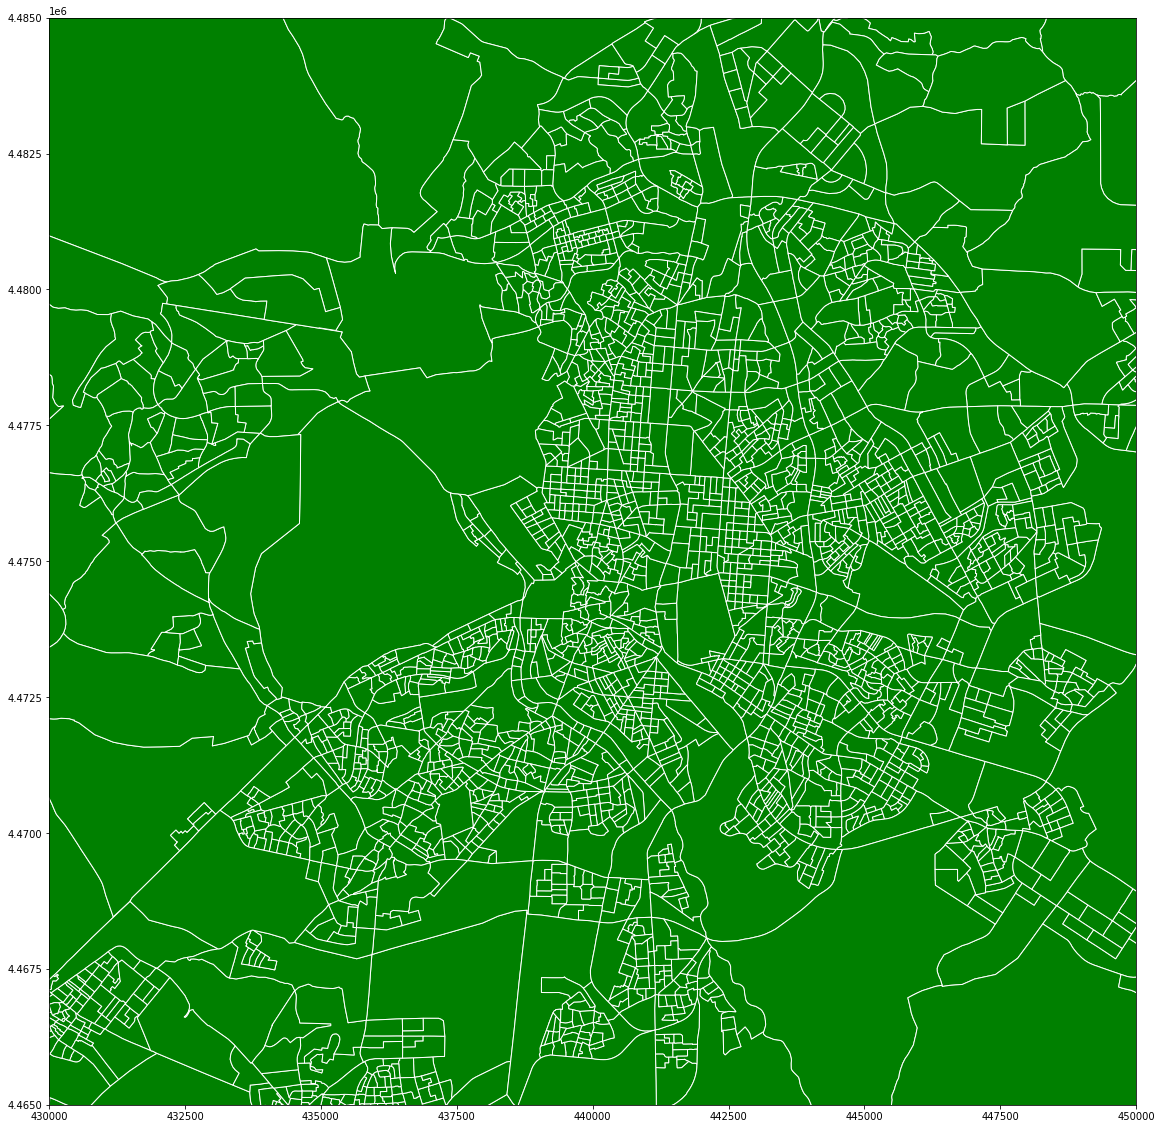

In [ ]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), color = 'green', edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Si seleccionamos una columna, geopandas nos colorea las secciones según ella, en este caso la de las CCAA.

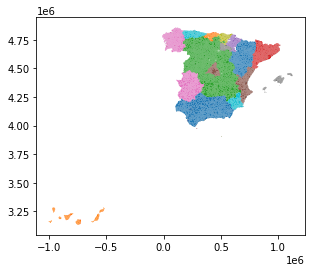

In [ ]:
secciones.plot(column = 'NCA')

Un ejemplo similar con las provincias.

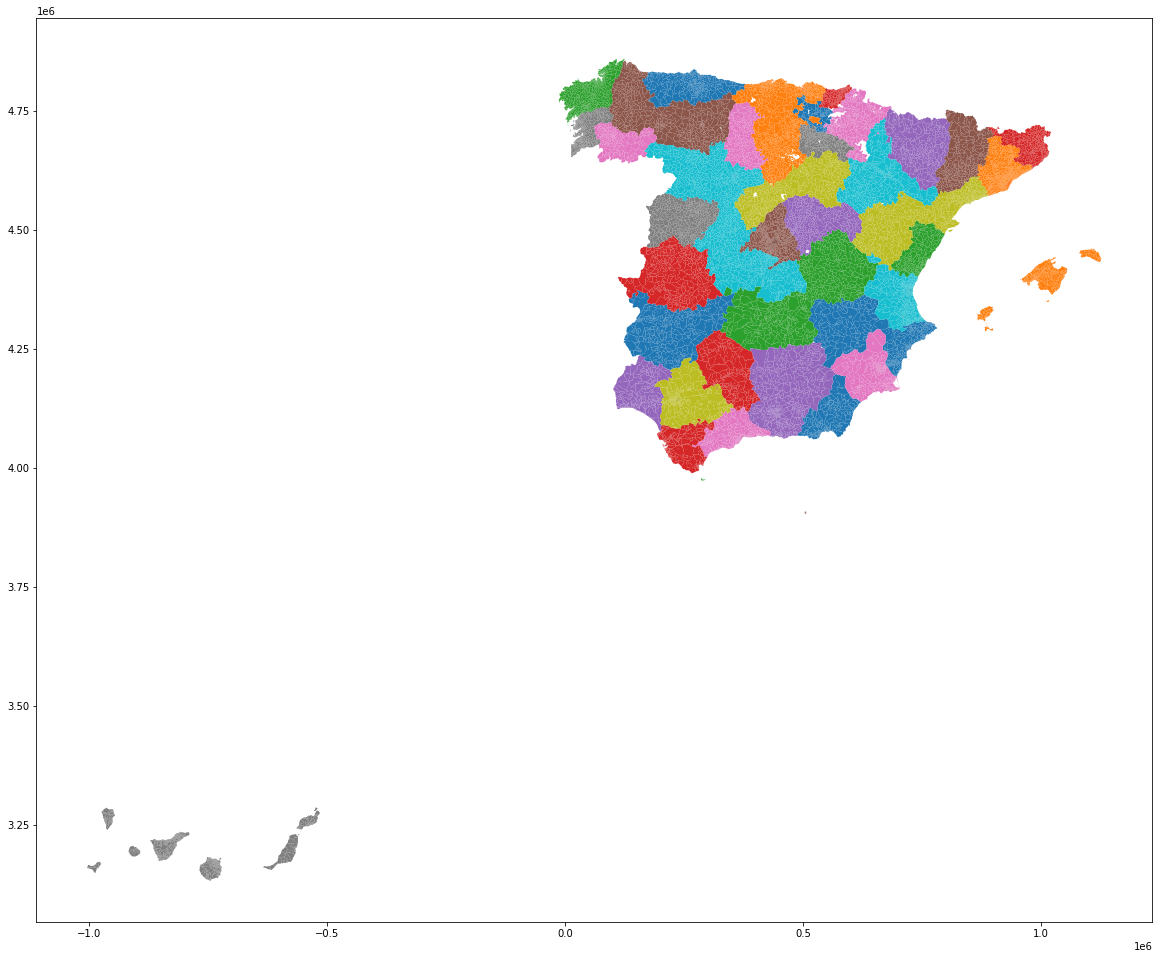

In [ ]:
secciones.plot(column = 'NPRO', figsize = (20,20))

In [ ]:
secciones.to_file("/content/drive/MyDrive/Geopandas_A19/secciones_A19.shp")

Un método fundamental para nosotros de Geopandas es que podemos pasar un fichero shapely a geojson con facilidad, como hacemos a continuación.

In [ ]:
secciones.to_file("/content/drive/MyDrive/Geopandas_A19/secciones_A19_geojson.geojson", driver='GeoJSON')

In [ ]:
secciones

OBJECTID  ...                                           geometry
0             1  ...  MULTIPOLYGON (((556453.835 4752758.332, 556460...
1             2  ...  POLYGON ((502035.230 4771813.197, 502048.071 4...
2             3  ...  MULTIPOLYGON (((538984.636 4718139.608, 538985...
3             4  ...  POLYGON ((537063.531 4703664.589, 536887.844 4...
4             6  ...  POLYGON ((551570.951 4739269.962, 551570.889 4...
...         ...  ...                                                ...
36312     10673  ...  POLYGON ((17713.727 4798559.174, 17794.388 479...
36313     10659  ...  POLYGON ((75420.668 4796270.576, 75442.668 479...
36314     10189  ...  POLYGON ((59718.470 4802760.627, 59735.222 480...
36315     13100  ...  POLYGON ((151385.134 4180084.902, 151402.134 4...
36316     35989  ...  POLYGON ((372352.294 4067015.716, 372339.457 4...

[36317 rows x 24 columns]

Ahora podemos cargar nuestro dataset de las elecciones de abril de 2019, al que correspondería la definición de las secciones con shapely.

In [ ]:
cols_str = {'cod_ccaa' : 'str', 'cod_prov' : 'str', 'cod_mun' : 'str', 'cod_sec' : 'str', 'cod_grupo' : 'str'}

In [ ]:
df_secciones = pd.read_csv('/content/drive/MyDrive/Proyecto_KeepCoding (1)/Data/Gen-19-Abr/gen_A19_unif_cols_prov.txt', dtype = cols_str)

In [ ]:
df_secciones

Sección  ... cod_grupo
0      022019041010400101001  ...   0400101
1      022019041010400201001  ...   0400201
2      022019041010400301001  ...   0400301
3      022019041010400301002  ...   0400301
4      022019041010400301003  ...   0400301
...                      ...  ...       ...
36312  022019041195200108011  ...   5200108
36313  022019041195200108012  ...   5200108
36314  022019041195200108013  ...   5200108
36315  022019041195200108014  ...   5200108
36316  022019041195200108015  ...   5200108

[36317 rows x 98 columns]

In [ ]:
df_secciones.dtypes

Sección                  object
cod_ccaa                 object
cod_prov                 object
cod_mun                  object
cod_sec                  object
                         ...   
Renta Desempleo 2018    float64
Renta Desempleo 2015    float64
dict_res                 object
dict_res_ord             object
cod_grupo                object
Length: 98, dtype: object

Cambiamos el nombre de la columna del código de sección para que coincida con el que el tiene la definición geométrica.

In [ ]:
df_secciones = df_secciones.rename(columns = {'cod_sec': 'CUSEC'})

In [ ]:
secciones.columns

Index(['OBJECTID', 'CUSEC', 'CUMUN', 'CSEC', 'CDIS', 'CMUN', 'CPRO', 'CCA',
       'CUDIS', 'CLAU2', 'NPRO', 'NCA', 'CNUT0', 'CNUT1', 'CNUT2', 'CNUT3',
       'ESTADO', 'OBS', 'Shape_Leng', 'Shape_area', 'Shape_len', 'SUPERF_M2',
       'NMUN', 'geometry'],
      dtype='object')

Ahora hacemos el merge de ambos datasets. De esta forma tenemos la definición geométrica y los datos del dataset electoral en uno solo.

In [ ]:
secciones = pd.merge(secciones, df_secciones, how="left", on=['CUSEC'])

In [ ]:
secciones

OBJECTID  ... cod_grupo
0             1  ...   0100901
1             2  ...   0101001
2             3  ...   0103101
3             4  ...   0103301
4             6  ...   0103701
...         ...  ...       ...
36312     10673  ...   1509302
36313     10659  ...   1590203
36314     10189  ...   1503103
36315     13100  ...   2101701
36316     35989  ...   2906707

[36317 rows x 121 columns]

Ahora podemos pintar las secciones según quien fuese el partido que quedó en segundo lugar, lo que ocurres es que, si no le decimos nada, Geopandas asigna los colores por su cuenta.

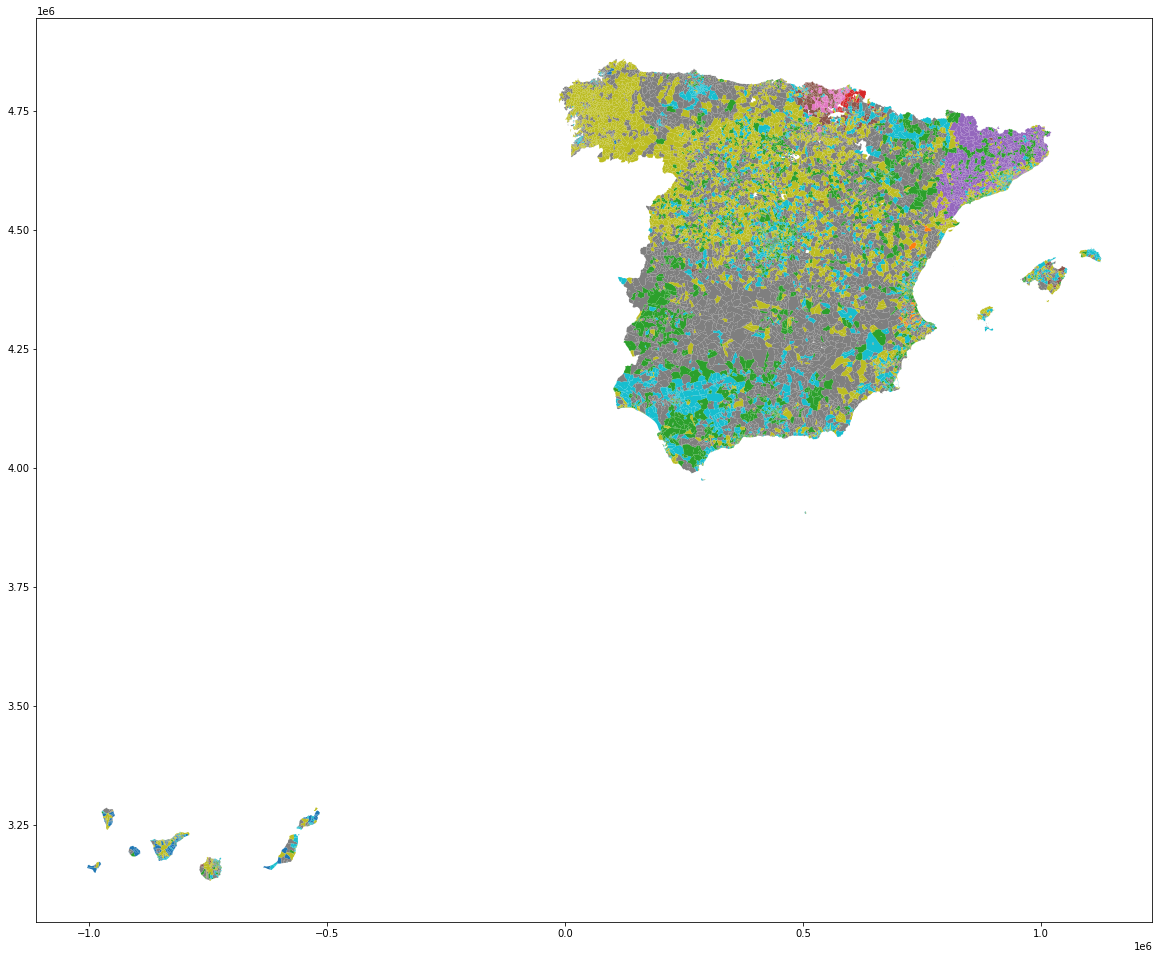

In [ ]:
secciones.plot(column = 'Segundo', figsize = (20,20))

Tenemos que definir los colores que queremos según los valores que aparezcan el la columna que queramos pintar. Pasamos esa información en un diccionario.

In [ ]:
color_map = {'BNG': 'green',
 'CC': '#C0CB2F',
 'Compromis': '#C29518',
 'Cs': 'orange',
 'ERC': 'yellow',
 'GBai': '#C93011',
 'JxC': '#3201AB',
 'Otros': 'cyan',
 'PACMA': 'pink',
 'PNV': '#8ED8A5',
 'PP': '#1604FA',
 'PRC': '#1E8E41',
 'PSOE': 'red',
 'UP': 'purple',
 'VOX': 'lightgreen'}

De esta forma geopandas hace el mapeo con los colores; podemos ver cómo queda con el partido ganador en las secciones del municipio de Madrid. No hemos conseguido implantar la leyenda, por desgracia, pero es fácilmente interpretable.

(4455000.0, 4500000.0)

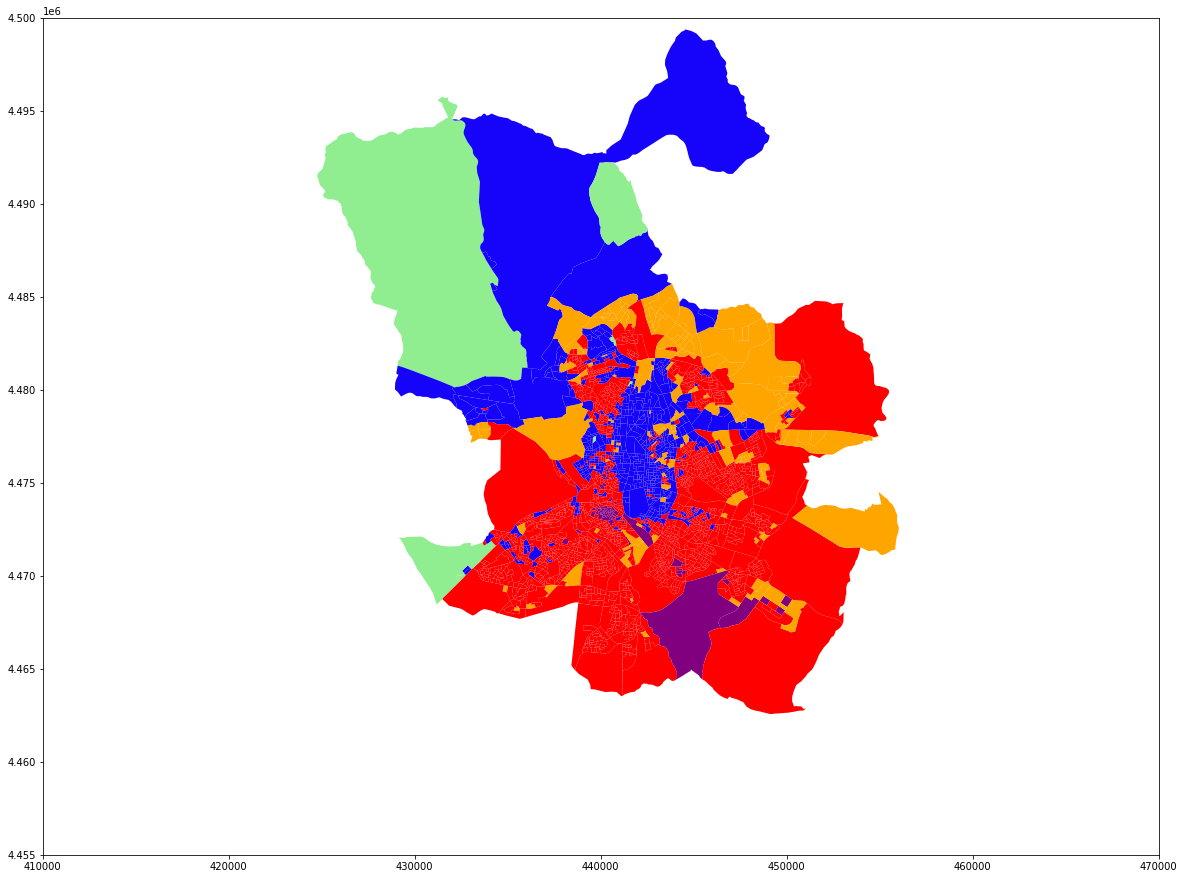

In [ ]:
ax = secciones.loc[secciones['CUMUN'] == '28079'].plot(figsize = (20,20), color = secciones.loc[secciones['CUMUN'] == '28079']['Ganador'].map(color_map), edgecolor = 'white', linewidth = 0.01)

ax.set_xlim([410000, 470000])
ax.set_ylim([4455000, 4500000])

In [ ]:
color_map

{'BNG': 'green',
 'CC': '#C0CB2F',
 'Compromis': '#C29518',
 'Cs': 'orange',
 'ERC': 'yellow',
 'GBai': '#C93011',
 'JxC': '#3201AB',
 'Otros': 'cyan',
 'PACMA': 'pink',
 'PNV': '#8ED8A5',
 'PP': '#1604FA',
 'PRC': '#1E8E41',
 'PSOE': 'red',
 'UP': 'purple',
 'VOX': 'lightgreen'}

Podemos concretar incluso un poco más dentro de la Comunidad de Madrid.

(4465000.0, 4485000.0)

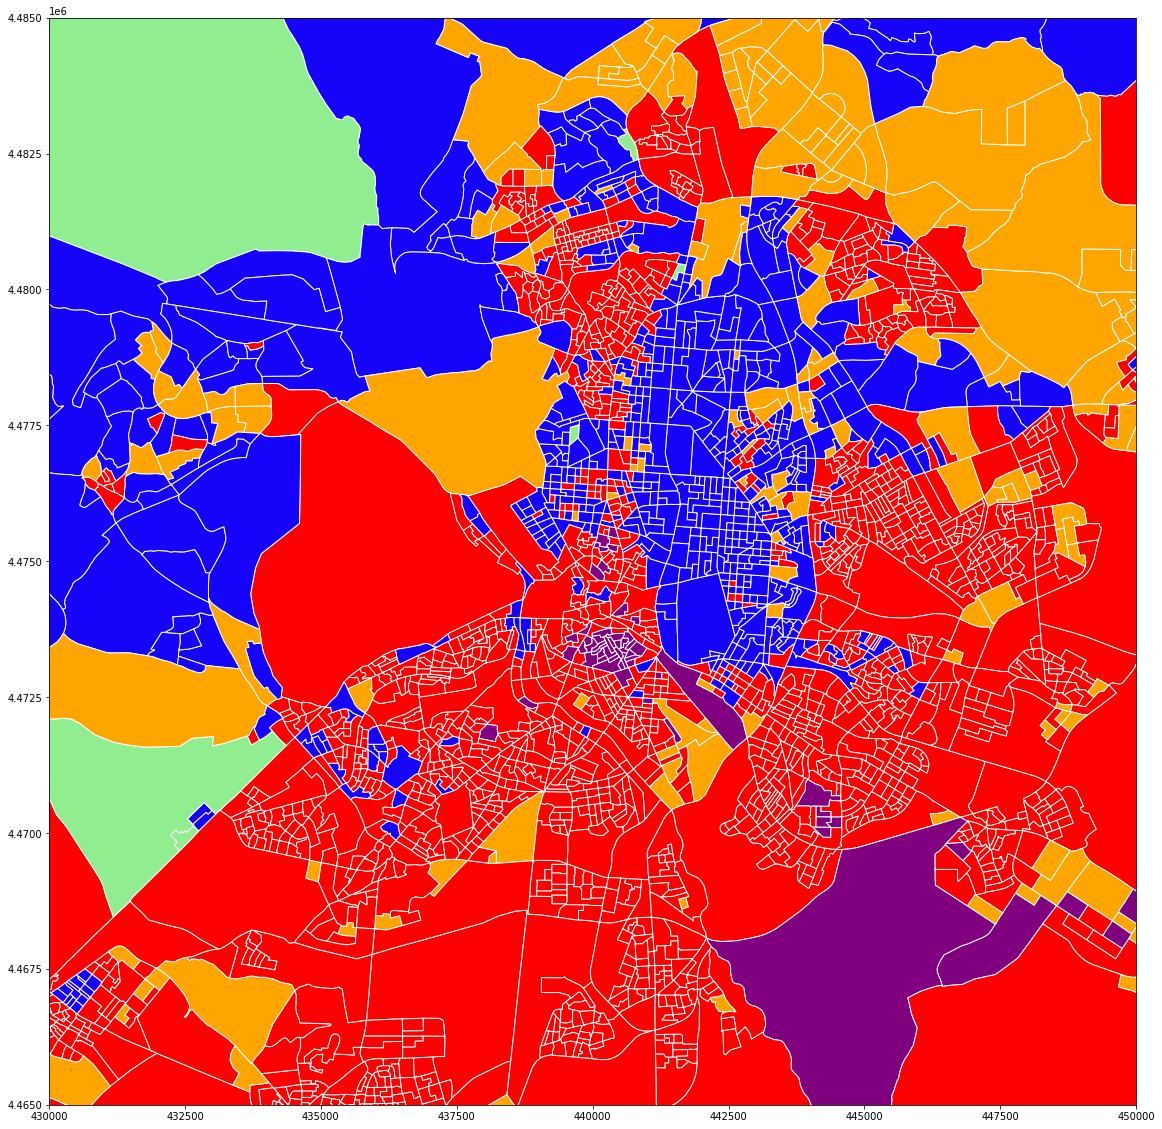

In [ ]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), color = secciones.loc[secciones['NPRO'] == 'Madrid']['Ganador'].map(color_map), edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Este es un ejemplo para toda España.

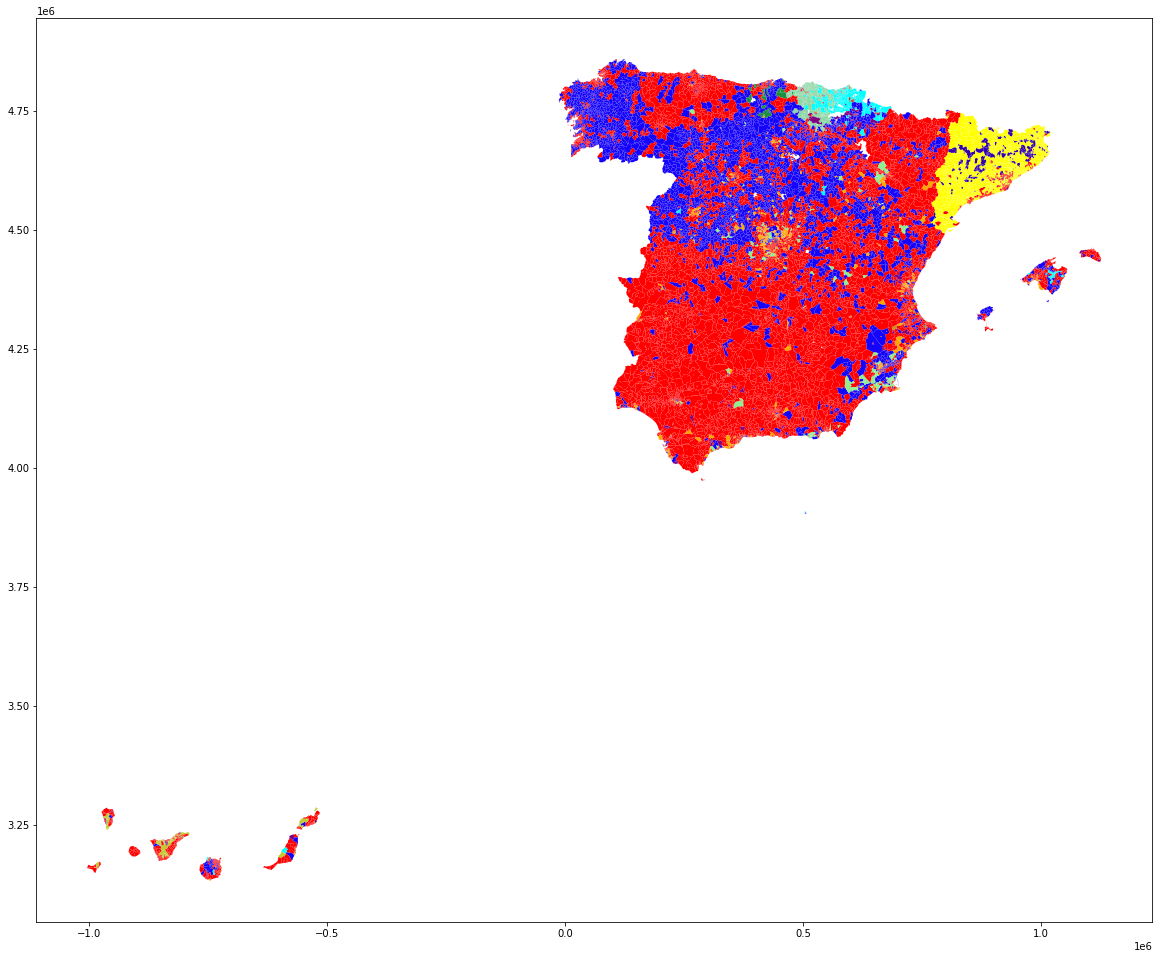

In [ ]:
secciones.plot(figsize = (20,20), color = secciones['Ganador'].map(color_map), edgecolor = 'white', linewidth = 0.01)

Podemos mapear columnas de valores continuos con escalas de colores predeterminadas, en este caso las de renta personal de 2017. Como se ve, en el centro del mapa (Madrid) hay unos valores muy superiores al resto, ya que se ve el color verde.

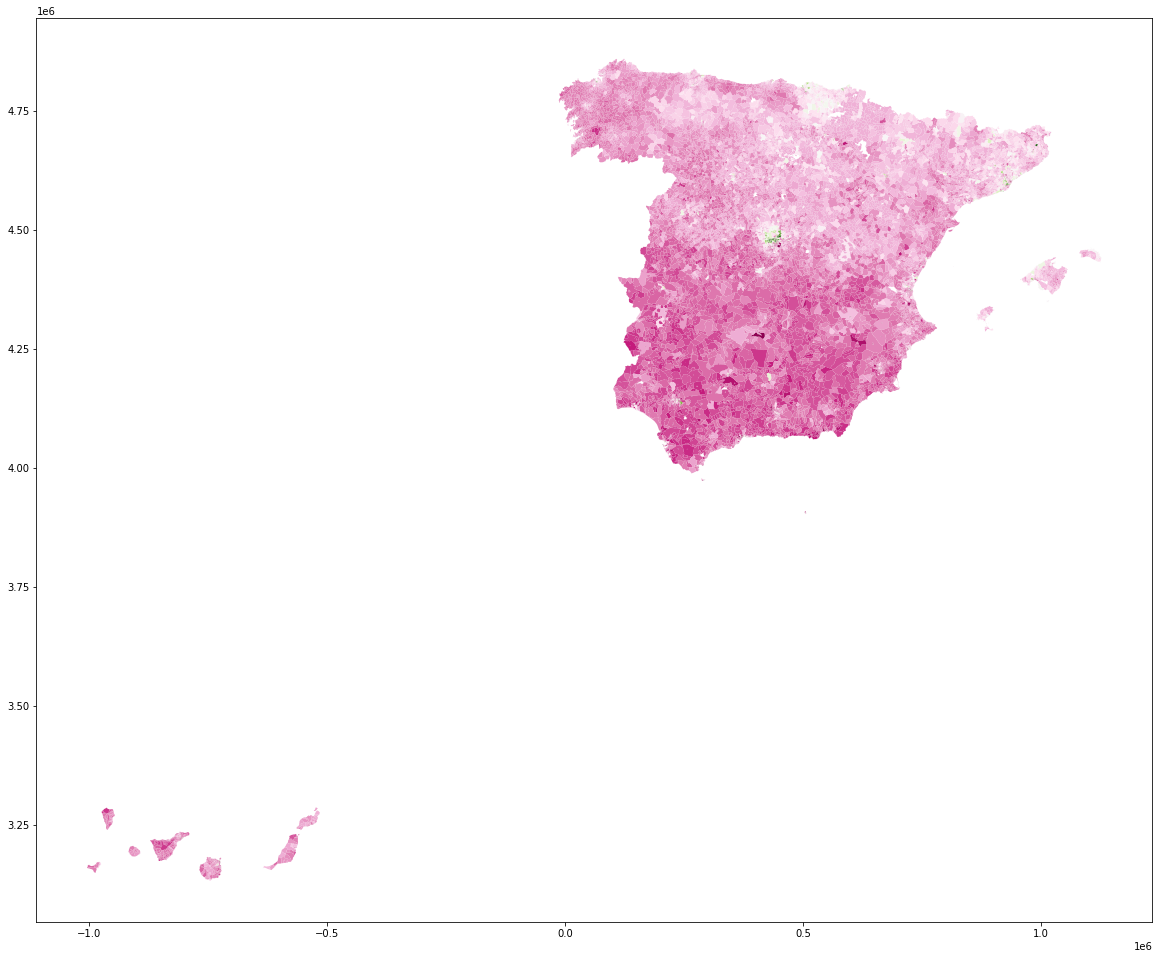

In [ ]:
secciones.plot(figsize = (20,20), column = 'Renta persona 2017', edgecolor = 'white', linewidth = 0.01, cmap = plt.cm.get_cmap('PiYG'))

Este contraste se ve claramente haciendo un zoom en el centro de Madrid.

(4465000.0, 4485000.0)

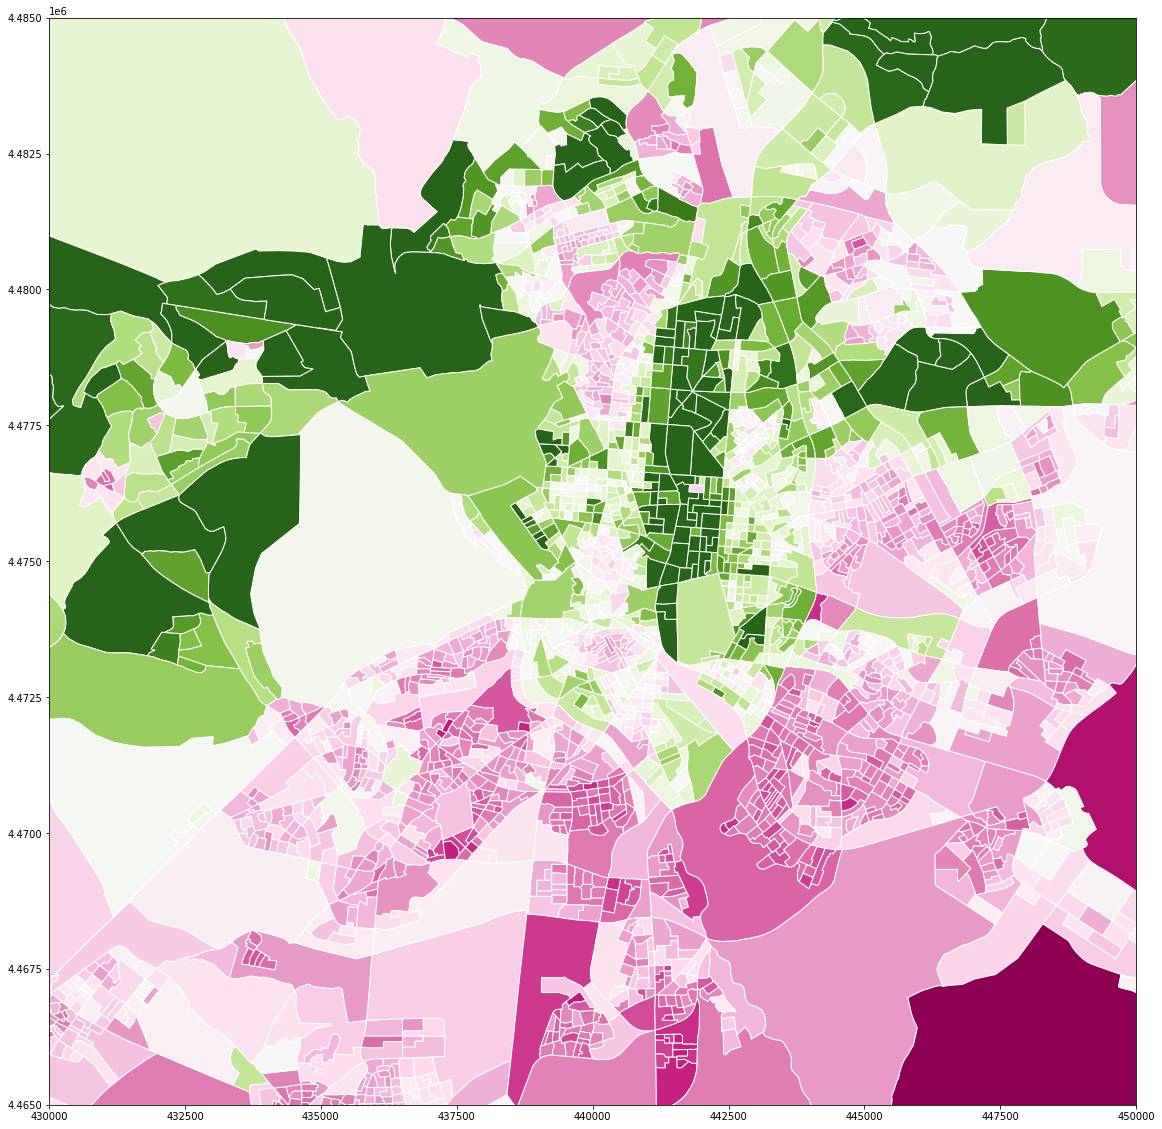

In [ ]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), column = 'Renta persona 2017', cmap = plt.cm.get_cmap('PiYG'), edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Por último hacemos el ejercicio de ver la densidad de población. Por supuesto, podemos definir nuevas columnas en el dataframe. Las densidades que se obtienen son muy variables, por lo que en perspectiva quizá habria que aplicarlas un logaritmo.

In [ ]:
secciones['Den. Población (hab/Km2)'] = secciones['Población Total'] / secciones['Shape_area'] * 1000000

In [ ]:
secciones['Población Total'].sum()

47026208

In [ ]:
secciones['Shape_area'].sum() / 1000000

506095.0184911206

In [ ]:
secciones['Den. Población (hab/Km2)'].describe()

count     36317.000000
mean      14352.732530
std       18462.856240
min           0.234093
25%         106.749099
50%        6540.483105
75%       22969.608578
max      188179.914261
Name: Den. Población (hab/Km2), dtype: float64

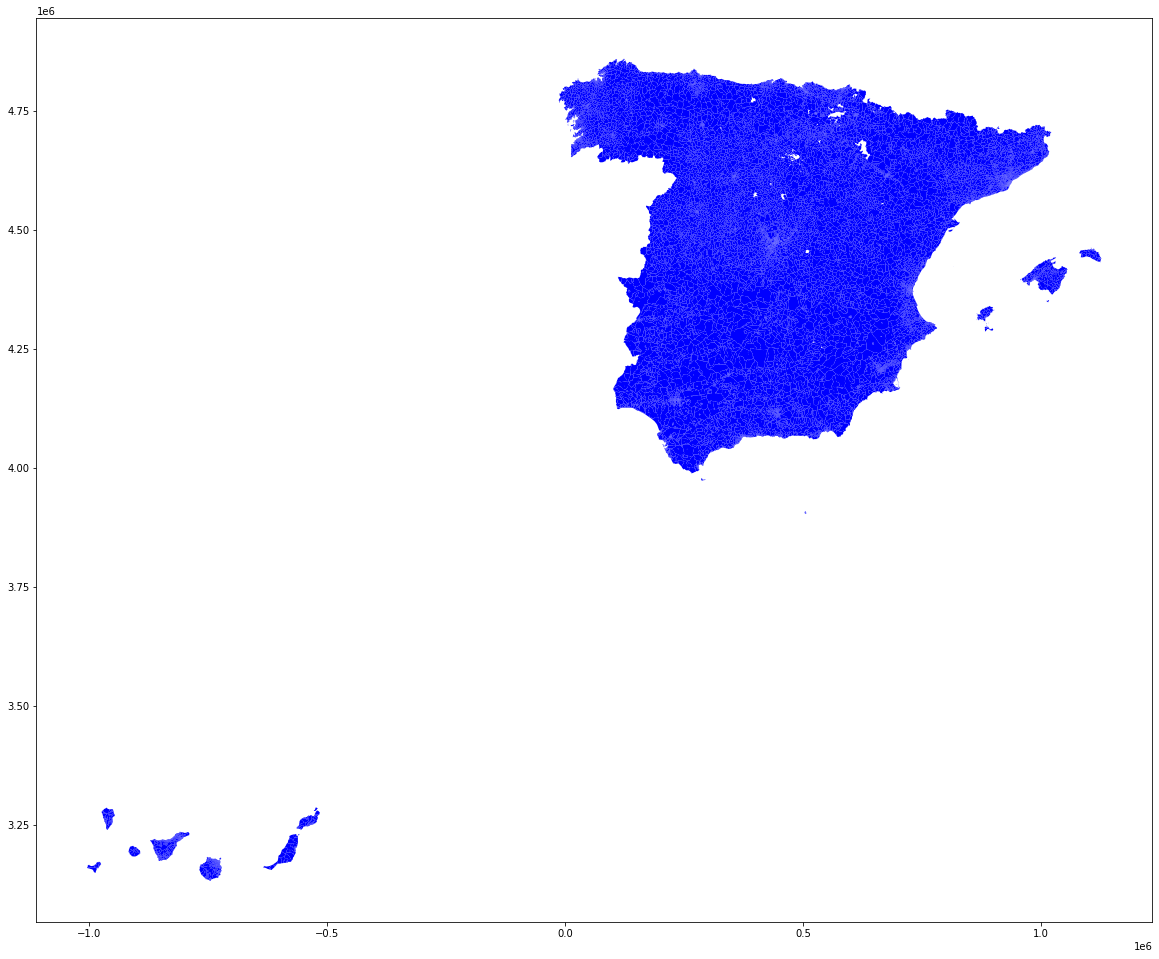

In [ ]:
ax = secciones.plot(figsize = (20,20), column = 'Den. Población (hab/Km2)' , edgecolor = 'white', linewidth = 0.01, cmap = plt.cm.get_cmap('bwr'))


En definitiva creesmos que Geopandas es una librería muy útiles para la visualización, al menos en un primer momento. Por otro lado, ésta contiene métodos geográficos que nos serán muy útiles para ver la equivalencia de las secciones electorales de una elección a otra, algo muy importante y que trataremos en otro cuaderno.